Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv("/content/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **Data Preprocessing**

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.shape

(400, 11)

In [5]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
data['Sales'].values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [11]:
data['Sales']=pd.cut(np.array([ 9.5 , 11.22, 10.06,  7.4 , 4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low", "Medium", "High"])

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
data['ShelveLoc'] =label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] =label_encoder.fit_transform(data['US'])

In [14]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,Medium,139,23,3,37,120,2,55,11,0,1
397,Medium,162,26,12,368,159,2,40,18,1,1
398,Medium,100,79,7,284,95,0,50,12,1,1


In [15]:
x = data.iloc[:,1:]
y = data['Sales']

In [16]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [18]:
data['Sales'].unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [19]:
data.Sales.value_counts()

Medium    247
Low       102
High       51
Name: Sales, dtype: int64

In [20]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

**Splitting data into training and testing data set**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.33,random_state=10)

**Building Decision Tree Classifier using Entropy Criteria**

In [22]:
model =DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred =model.predict(x_test)

# **Plot Decision Tree**

[Text(0.5, 0.875, 'X[5] <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]'),
 Text(0.25, 0.625, 'X[4] <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]'),
 Text(0.125, 0.375, 'X[3] <= 69.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.439\nsamples = 11\nvalue = [0, 1, 10]'),
 Text(0.375, 0.375, 'X[4] <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.75, 0.625, 'X[5] <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]'),
 Text(0.625, 0.375, 'X[4] <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]'),
 Text(0.5625, 0.125, 'entropy = 0.869\nsamples = 31\nvalue = [22, 0, 9]'),
 Text(0.6875, 0.125, 'entropy = 0.893\nsamples = 26\nvalue = [3, 2, 21]'),
 Text(0.875, 0.375, 

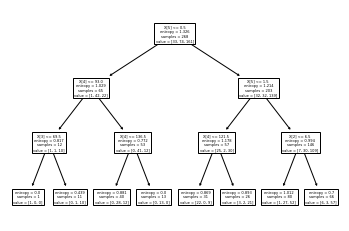

In [23]:
tree.plot_tree(model)

[Text(0.5, 0.875, 'Price <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]\nclass = Low'),
 Text(0.25, 0.625, 'Population <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]\nclass = High'),
 Text(0.125, 0.375, 'Advertising <= 69.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]\nclass = Low'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Medium'),
 Text(0.1875, 0.125, 'entropy = 0.439\nsamples = 11\nvalue = [0, 1, 10]\nclass = Low'),
 Text(0.375, 0.375, 'Population <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]\nclass = High'),
 Text(0.3125, 0.125, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]\nclass = High'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]\nclass = High'),
 Text(0.75, 0.625, 'Price <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]\nclass = Low'),
 Text(0.625, 0.375, 'Population <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]\nclass = Low'),
 Text(

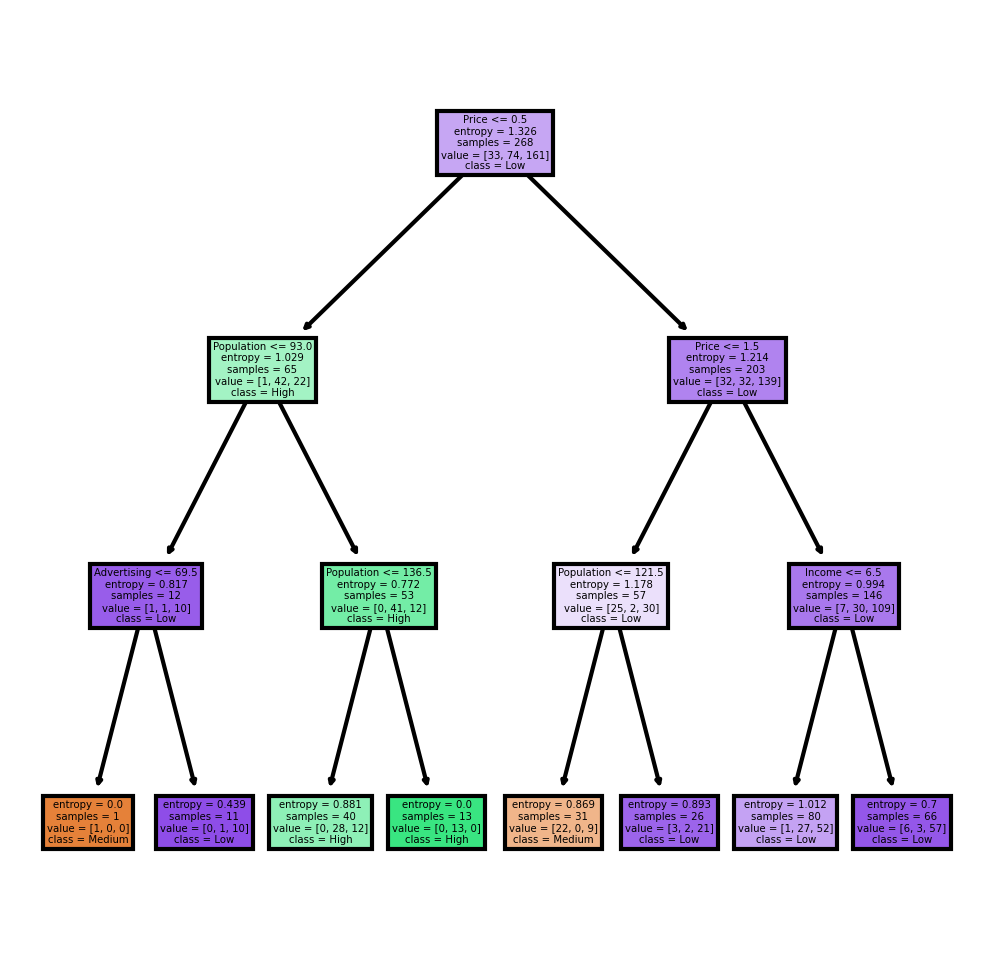

In [24]:
fn= ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Medium', 'High', 'Low']
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)

# **Prediction On Test Data**

In [25]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
     

In [26]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.6136363636363636

In [27]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

51

In [28]:
pd.crosstab(y_test,y_pred)

col_0,High,Low,Medium
Sales,,,
Low,0,11,17
Medium,7,13,66
High,4,0,14


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.36      0.22      0.28        18
         Low       0.46      0.39      0.42        28
      Medium       0.68      0.77      0.72        86

    accuracy                           0.61       132
   macro avg       0.50      0.46      0.47       132
weighted avg       0.59      0.61      0.60       132



In [30]:
data['Sales'] = label_encoder.fit_transform(data['Sales'])

In [31]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [32]:
data =np.array(data)

In [33]:
x=data[:,1:]
y=data[:,0]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=10)

In [35]:
x_test

array([[106,  33,  20, ...,  12,   1,   1],
       [132, 118,  12, ...,  14,   1,   1],
       [133, 103,  14, ...,  17,   1,   1],
       ...,
       [108,  38,   0, ...,  14,   0,   0],
       [131, 113,   0, ...,  14,   1,   0],
       [125,  67,   0, ...,  11,   1,   0]])

# **Decision Tree Regression Example**

In [36]:
from  sklearn.tree import DecisionTreeRegressor

In [37]:
model1 =DecisionTreeRegressor()
model1.fit(x_train,y_train)
y_pred1 =model1.predict(x_test)

[Text(0.5361238532110092, 0.9642857142857143, 'X[5] <= 1.5\nsquared_error = 0.496\nsamples = 268\nvalue = 1.478'),
 Text(0.28172782874617736, 0.8928571428571429, 'X[4] <= 118.5\nsquared_error = 0.594\nsamples = 122\nvalue = 1.213'),
 Text(0.1345565749235474, 0.8214285714285714, 'X[5] <= 0.5\nsquared_error = 0.729\nsamples = 59\nvalue = 0.983'),
 Text(0.05504587155963303, 0.75, 'X[6] <= 53.0\nsquared_error = 0.307\nsamples = 30\nvalue = 1.4'),
 Text(0.024464831804281346, 0.6785714285714286, 'X[4] <= 113.0\nsquared_error = 0.109\nsamples = 8\nvalue = 1.875'),
 Text(0.012232415902140673, 0.6071428571428571, 'squared_error = 0.0\nsamples = 7\nvalue = 2.0'),
 Text(0.03669724770642202, 0.6071428571428571, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.0856269113149847, 0.6785714285714286, 'X[6] <= 77.0\nsquared_error = 0.267\nsamples = 22\nvalue = 1.227'),
 Text(0.06116207951070336, 0.6071428571428571, 'X[4] <= 82.0\nsquared_error = 0.184\nsamples = 16\nvalue = 1.062'),
 Text(0.04

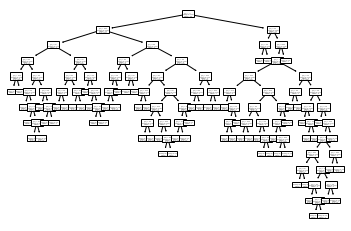

In [38]:
tree.plot_tree(model1)

[Text(0.5361238532110092, 0.9642857142857143, 'ShelveLoc <= 1.5\nsquared_error = 0.496\nsamples = 268\nvalue = 1.478'),
 Text(0.28172782874617736, 0.8928571428571429, 'Price <= 118.5\nsquared_error = 0.594\nsamples = 122\nvalue = 1.213'),
 Text(0.1345565749235474, 0.8214285714285714, 'ShelveLoc <= 0.5\nsquared_error = 0.729\nsamples = 59\nvalue = 0.983'),
 Text(0.05504587155963303, 0.75, 'Age <= 53.0\nsquared_error = 0.307\nsamples = 30\nvalue = 1.4'),
 Text(0.024464831804281346, 0.6785714285714286, 'Price <= 113.0\nsquared_error = 0.109\nsamples = 8\nvalue = 1.875'),
 Text(0.012232415902140673, 0.6071428571428571, 'squared_error = 0.0\nsamples = 7\nvalue = 2.0'),
 Text(0.03669724770642202, 0.6071428571428571, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.0856269113149847, 0.6785714285714286, 'Age <= 77.0\nsquared_error = 0.267\nsamples = 22\nvalue = 1.227'),
 Text(0.06116207951070336, 0.6071428571428571, 'Price <= 82.0\nsquared_error = 0.184\nsamples = 16\nvalue = 1.062'),

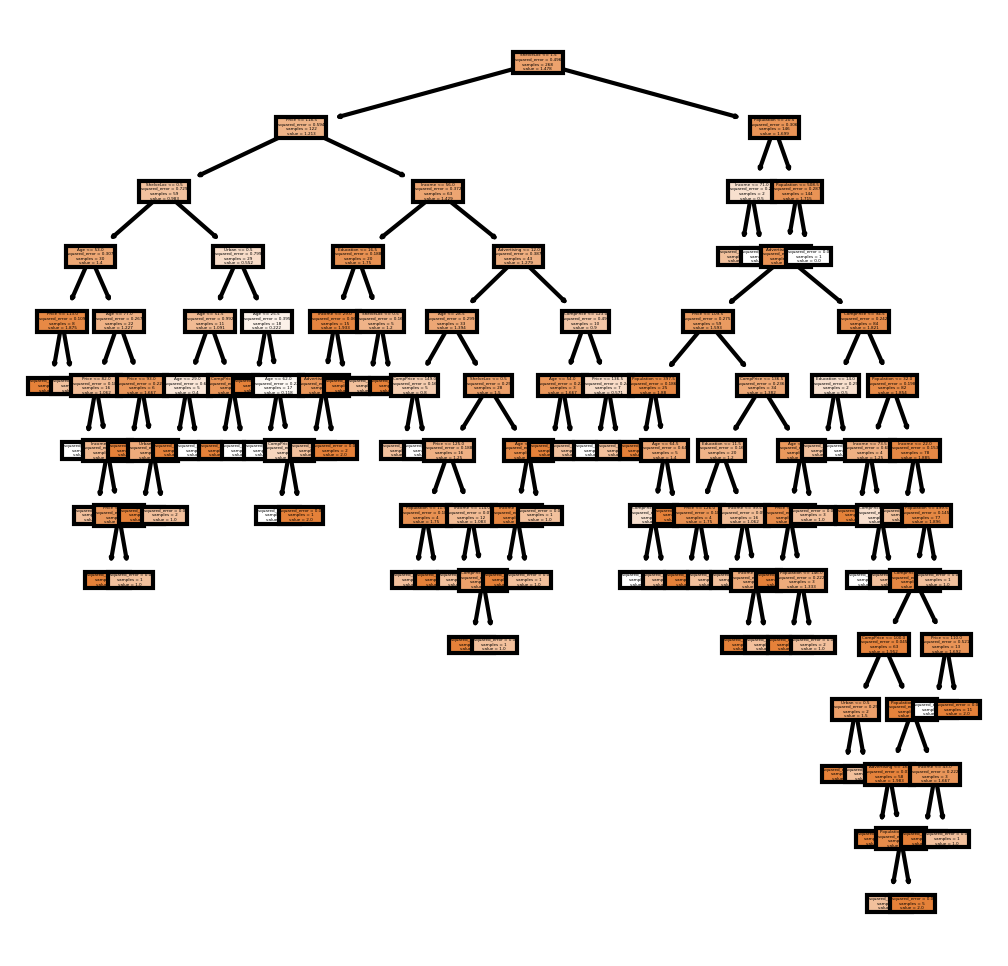

In [39]:
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Medium', 'High', 'Low']
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model1,feature_names=fn,
               class_names=cn,
               filled= True)

In [40]:
y_pred1

array([1., 2., 0., 1., 2., 2., 2., 2., 2., 2., 2., 0., 1., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 0., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
       2., 1., 2., 1., 0., 1., 2., 1., 0., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 0., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 0., 1., 2.,
       2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 0., 1., 0., 2., 2., 2.,
       0., 2., 0., 2., 2., 1., 1., 2., 2., 1., 0., 1., 1.])

In [41]:
accuracy1 =accuracy_score(y_test,y_pred1)
accuracy1

0.5984848484848485

In [42]:
count_misclassified =(y_test != y_pred1).sum()
count_misclassified

53

In [43]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.46      0.33      0.39        18
           1       0.38      0.50      0.43        28
           2       0.72      0.69      0.70        86

    accuracy                           0.60       132
   macro avg       0.52      0.51      0.51       132
weighted avg       0.61      0.60      0.60       132

